In [2]:
import pandas as pd
import numpy as np

data = {
    'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Median House Price': [340000, 370000, 350000, 420000, 425000, 500000, 520000, 550000, 596000, 610000, 660000, 720000, 73000, 76000],
    'Westpac Forecast': [56, 53, np.nan, 13, 33, -5, 45, 34, 34, 20, -20, 15, 15, -10],
    'Joe Bloggs Forecast': [23, 34, 19, 42, 23, 15, 1500, 18, 19, 23, 13, 8, 7, -2],
    'Harry Spent Forecast': [-20, -80, -70, -80, -50, -90, -30, np.nan, -110, -90, -60, -69, -80, -80]
}

df = pd.DataFrame(data)

# Convert 'Joe Bloggs Forecast' to percentage (correcting $ to %)
df['Joe Bloggs Forecast'] = df['Joe Bloggs Forecast'].apply(lambda x: x if isinstance(x, (int, float)) and x < 100 else np.nan)

# Calculate Forecast Errors
def calculate_errors(forecast_col):
    return df.apply(lambda row: ((row[forecast_col] / 100 + 1) * row['Median House Price'] - row['Median House Price']) / row['Median House Price'] * 100 if not pd.isna(row[forecast_col]) else np.nan, axis=1)

df['Westpac Error'] = calculate_errors('Westpac Forecast')
df['Joe Bloggs Error'] = calculate_errors('Joe Bloggs Forecast')
df['Harry Spent Error'] = calculate_errors('Harry Spent Forecast')

# Calculate Mean and Median Absolute Errors
mean_errors = df[['Westpac Error', 'Joe Bloggs Error', 'Harry Spent Error']].abs().mean()
median_errors = df[['Westpac Error', 'Joe Bloggs Error', 'Harry Spent Error']].abs().median()

# Summary of results
summary = {
    'Mean Absolute Error': mean_errors.to_dict(),
    'Median Absolute Error': median_errors.to_dict()
}

print("Summary of Errors:")
print(summary)


Summary of Errors:
{'Mean Absolute Error': {'Westpac Error': 27.153846153846153, 'Joe Bloggs Error': 18.92307692307692, 'Harry Spent Error': 69.92307692307692}, 'Median Absolute Error': {'Westpac Error': 20.0, 'Joe Bloggs Error': 19.0, 'Harry Spent Error': 80.0}}


Enhanced image saved as 'C:\Users\LEGION\Desktop\data_analyst_test\enhanced_map_screenshot.png'


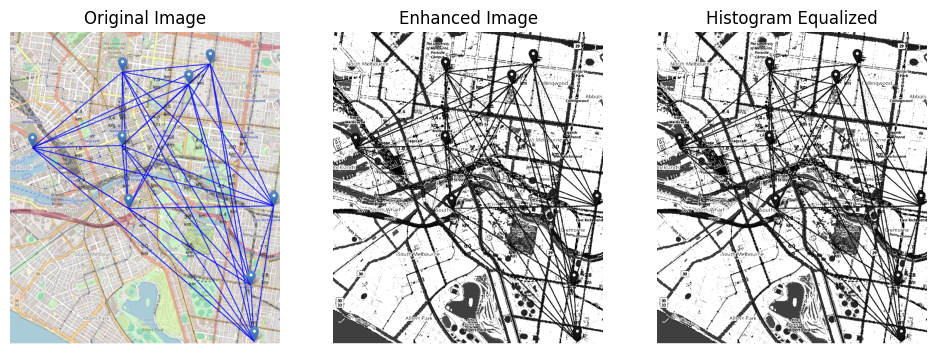

In [5]:

from PIL import Image, ImageEnhance, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Path to the screenshot
image_path = 'map.png'  

# Load the screenshot
image = Image.open(image_path)

# Convert the image to numpy array for processing
image_np = np.array(image)

# Display the original image
plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# Enhance contrast more aggressively
enhancer = ImageEnhance.Contrast(image)
image_contrast = enhancer.enhance(4)  # Further increase contrast

# Enhance brightness more aggressively
enhancer = ImageEnhance.Brightness(image_contrast)
image_brightness = enhancer.enhance(2)  # Further increase brightness

# Increase sharpness significantly
enhancer = ImageEnhance.Sharpness(image_brightness)
image_sharp = enhancer.enhance(3)  # Increase sharpness

# Convert to grayscale
image_gray = image_sharp.convert('L')

# Apply histogram equalization to improve contrast
image_np_gray = np.array(image_gray)
image_eq = exposure.equalize_hist(image_np_gray)

# Convert back to PIL image
image_eq_pil = Image.fromarray((image_eq * 255).astype(np.uint8))

# Save the enhanced image
enhanced_image_path = r'C:\Users\LEGION\Desktop\data_analyst_test\enhanced_map_screenshot.png'  # Path to save the enhanced image
image_eq_pil.save(enhanced_image_path)

# Display the enhanced image
plt.subplot(1, 4, 2)
plt.title('Enhanced Image')
plt.imshow(image_eq_pil, cmap='gray')
plt.axis('off')

print(f"Enhanced image saved as '{enhanced_image_path}'")

# Optionally, display a histogram-equalized version
plt.subplot(1, 4, 3)
plt.title('Histogram Equalized')
plt.imshow(image_eq_pil, cmap='gray')
plt.axis('off')

plt.show()
